## Welcome to the last notebook in this tutorial

Can we get more creative, yes? its all about asking questions, and explore them to get an answer:
   - what will happen if we increase the features, will the model accuarcy get higher ?
   - What if we can do some feature engineering, will it increase the accuracy ?
   - Can we try a deeper model, deep learning?
   - Which feature among the 7 is giving us the most accuracy? 
   - Is the 98% accuracy of RF good enough?
   - feel free to add more, and ask more. it's all about the journey

#### This notebook asks the question of "what will happen if we can average across all 28 features from the following data types"
 - ModelMag
 - CModelMag
 - PfsMag

in this notebook we will try to build a more complicated model by performing first some feature engineering, then build a ML model classifier

The idea of the feature enginnering is shown in the following figure

<img src="fe.png" width="600" height="200">


### Now let us create 28 features per group.

In [1]:
import astropy.io.fits as fits  #package provides access to FITS file fromat

filename = '/idia/projects/hippo/astroml/data/sdss_all_large_dr16_red_catwise.fits.gz'
fitsFile = fits.open(filename, memmap=True)

In [2]:
from astropy.table import Table
# is there is a way to make those lines to run faster ? ?  ? ? ? ?
table_data = Table(fitsFile[1].data) 
df_main = table_data.to_pandas()


#### Creat 3 diffrint data frames per model (modelMag, CmodelMag, PSFMag)

In [3]:
data_ModelM = df_main[['modelMag_u','modelMag_g','modelMag_r','modelMag_i','modelMag_z', 'W1mproPM', 'W2mproPM']]
data_ModelC = df_main[['cmodelMag_u','cmodelMag_g','cmodelMag_r','cmodelMag_i','cmodelMag_z',  'W1mproPM', 'W2mproPM']]
data_ModelP = df_main[['psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',  'W1mproPM', 'W2mproPM']]

now let us rename them

In [4]:
df_M = data_ModelM.rename({'modelMag_u':'Mu', 'modelMag_g':'Mg', 'modelMag_r':'Mr',
                      'modelMag_i':'Mi', 'modelMag_z':'Mz', 'W1mproPM':'W1', 'W2mproPM':'W2'}, axis='columns')

df_C = data_ModelC.rename({'cmodelMag_u':'Cu', 'cmodelMag_g':'Cg', 'cmodelMag_r':'Cr',
                      'cmodelMag_i':'Ci', 'cmodelMag_z':'Cz', 'W1mproPM':'W1', 'W2mproPM':'W2'}, axis='columns')

df_P = data_ModelP.rename({'psfMag_u':'Pu', 'psfMag_g':'Pg', 'psfMag_r':'Pr',
                      'psfMag_i':'Pi', 'psfMag_z':'Pz', 'W1mproPM':'W1', 'W2mproPM':'W2'}, axis='columns')

Now let us visualise what we created 

In [5]:
print(df_M.head(2))
print()
print(df_C.head(2))
print()
print(df_P.head(2))

          Mu         Mg         Mr         Mi         Mz      W1      W2
0  20.391554  20.329977  20.306154  20.072433  19.909691  19.481  19.015
1  22.861437  21.111048  20.074354  19.361259  19.039858  18.680  19.090

          Cu         Cg         Cr         Ci         Cz      W1      W2
0  20.364080  20.345837  20.306116  20.076281  19.942125  19.481  19.015
1  20.313438  21.207047  20.029531  19.311844  18.998163  18.680  19.090

          Pu         Pg         Pr         Pi         Pz      W1      W2
0  20.424824  20.361526  20.346304  20.097925  19.909204  19.481  19.015
1  23.067766  21.908581  21.060938  20.433397  20.140497  18.680  19.090


In [6]:
# remove trail space from "specclass"
# df_M['specclass'] = df_M['specclass'].str.strip() 
# df_C['specclass'] = df_C['specclass'].str.strip()
# df_P['specclass'] = df_P['specclass'].str.strip()

print(df_M.head(2))
print()
print(df_C.head(2))
print()
print(df_P.head(2))

          Mu         Mg         Mr         Mi         Mz      W1      W2
0  20.391554  20.329977  20.306154  20.072433  19.909691  19.481  19.015
1  22.861437  21.111048  20.074354  19.361259  19.039858  18.680  19.090

          Cu         Cg         Cr         Ci         Cz      W1      W2
0  20.364080  20.345837  20.306116  20.076281  19.942125  19.481  19.015
1  20.313438  21.207047  20.029531  19.311844  18.998163  18.680  19.090

          Pu         Pg         Pr         Pi         Pz      W1      W2
0  20.424824  20.361526  20.346304  20.097925  19.909204  19.481  19.015
1  23.067766  21.908581  21.060938  20.433397  20.140497  18.680  19.090


Creating colors for each model

In [7]:
dfArr = [df_M, df_C, df_P]

for df, char in zip(dfArr, ['M', 'C', 'P']):
    print(df.head(1))
    print(char+'u-g')
    df[char+'u-g'] = df[char+'u']- df[char+'g']
    df[char+'u-r'] = df[char+'u']- df[char+'r']
    df[char+'u-i'] = df[char+'u']- df[char+'i']
    df[char+'u-z'] = df[char+'u']- df[char+'z']

    df[char+'g-r'] = df[char+'g']- df[char+'r']
    df[char+'g-i'] = df[char+'g']- df[char+'i']
    df[char+'g-z'] = df[char+'g']- df[char+'z']

    df[char+'r-i'] = df[char+'r']- df[char+'i']
    df[char+'r-z'] = df[char+'r']- df[char+'z']

    df[char+'i-z'] = df[char+'i']-df[char+'z']
    ############## WISE ####################
    df[char+'u-w1'] = df[char+'u']- df['W1']
    df[char+'u-w2'] = df[char+'u']- df['W2']

    df[char+'g-w1'] = df[char+'g']- df['W1']
    df[char+'g-w2'] = df[char+'g']- df['W2']

    df[char+'r-w1'] = df[char+'r']- df['W1']
    df[char+'r-w2'] = df[char+'r']- df['W2']

    df[char+'i-w1'] = df[char+'i']- df['W1']
    df[char+'i-w2'] = df[char+'i']- df['W2']


    df[char+'z-w1'] = df[char+'z']- df['W1']
    df[char+'z-w2'] = df[char+'z']- df['W2']

    df[char+'w1-w2'] = df['W1']- df['W2']


          Mu         Mg         Mr         Mi         Mz      W1      W2
0  20.391554  20.329977  20.306154  20.072433  19.909691  19.481  19.015
Mu-g
         Cu         Cg         Cr         Ci         Cz      W1      W2
0  20.36408  20.345837  20.306116  20.076281  19.942125  19.481  19.015
Cu-g
          Pu         Pg         Pr         Pi         Pz      W1      W2
0  20.424824  20.361526  20.346304  20.097925  19.909204  19.481  19.015
Pu-g


In [8]:
print(df_M.head(2))
print(df_M.shape)
print()
print(df_C.head(2))
print(df_C.shape)
print()
print(df_P.head(2))
print(df_P.shape)


          Mu         Mg         Mr         Mi         Mz      W1      W2  \
0  20.391554  20.329977  20.306154  20.072433  19.909691  19.481  19.015   
1  22.861437  21.111048  20.074354  19.361259  19.039858  18.680  19.090   

       Mu-g      Mu-r      Mu-i  ...     Mu-w2     Mg-w1     Mg-w2     Mr-w1  \
0  0.061577  0.085400  0.319120  ...  1.376554  0.848977  1.314977  0.825155   
1  1.750389  2.787083  3.500177  ...  3.771436  2.431048  2.021047  1.394354   

      Mr-w2     Mi-w1     Mi-w2     Mz-w1     Mz-w2  Mw1-w2  
0  1.291155  0.591434  1.057434  0.428691  0.894691   0.466  
1  0.984354  0.681260  0.271259  0.359858 -0.050143  -0.410  

[2 rows x 28 columns]
(3500958, 28)

          Cu         Cg         Cr         Ci         Cz      W1      W2  \
0  20.364080  20.345837  20.306116  20.076281  19.942125  19.481  19.015   
1  20.313438  21.207047  20.029531  19.311844  18.998163  18.680  19.090   

       Cu-g      Cu-r      Cu-i  ...     Cu-w2     Cg-w1     Cg-w2     Cr-w1 

### now how do we take the mean of three different data frames into a new data frame

In [9]:
featNames = list(df_M.columns)
print(featNames)

['Mu', 'Mg', 'Mr', 'Mi', 'Mz', 'W1', 'W2', 'Mu-g', 'Mu-r', 'Mu-i', 'Mu-z', 'Mg-r', 'Mg-i', 'Mg-z', 'Mr-i', 'Mr-z', 'Mi-z', 'Mu-w1', 'Mu-w2', 'Mg-w1', 'Mg-w2', 'Mr-w1', 'Mr-w2', 'Mi-w1', 'Mi-w2', 'Mz-w1', 'Mz-w2', 'Mw1-w2']


In [10]:
import numpy as np
import pandas as pd
df_mean = pd.DataFrame()

for feat in featNames:
    if feat in ['W1', 'W2']:
        df_mean [feat] = df_M[feat]
        continue
    print(feat[1:]) # gets the raw form of the feature
    rawFeat = feat[1:]
    featMean = []
    for df, char in zip(dfArr, ['M', 'C', 'P']):
        # print(df[char+rawFeat].head(1))
        featMean.append(df[char+rawFeat])
    print( np.array(featMean).shape)
    ave = np.array(featMean).mean(0)
    df_mean [rawFeat] = ave
    
    print()
    # for feat

u
(3, 3500958)

g
(3, 3500958)

r
(3, 3500958)

i
(3, 3500958)

z
(3, 3500958)

u-g
(3, 3500958)

u-r
(3, 3500958)

u-i
(3, 3500958)

u-z
(3, 3500958)

g-r
(3, 3500958)

g-i
(3, 3500958)

g-z
(3, 3500958)

r-i
(3, 3500958)

r-z
(3, 3500958)

i-z
(3, 3500958)

u-w1
(3, 3500958)

u-w2
(3, 3500958)

g-w1
(3, 3500958)

g-w2
(3, 3500958)

r-w1
(3, 3500958)

r-w2
(3, 3500958)

i-w1
(3, 3500958)

i-w2
(3, 3500958)

z-w1
(3, 3500958)

z-w2
(3, 3500958)

w1-w2
(3, 3500958)



In [11]:
print(df_mean.head(2))
print(df_mean.shape)

           u          g          r          i          z      W1      W2  \
0  20.393486  20.345779  20.319525  20.082212  19.920340  19.481  19.015   
1  22.080879  21.408890  20.388275  19.702166  19.392839  18.680  19.090   

        u-g       u-r       u-i  ...      u-w2      g-w1      g-w2      r-w1  \
0  0.047706  0.073961  0.311273  ...  1.378486  0.864780  1.330780  0.838525   
1  0.671989  1.692606  2.378714  ...  2.990880  2.728892  2.318891  1.708275   

       r-w2      i-w1      i-w2      z-w1      z-w2  w1-w2  
0  1.304525  0.601213  1.067213  0.439341  0.905341  0.466  
1  1.298274  1.022167  0.612166  0.712839  0.302839 -0.410  

[2 rows x 28 columns]
(3500958, 28)


#### Creating the lables

In [12]:
classes = df_main['specclass']
classnames, labels = np.unique(np.array(classes), return_inverse=True)

now to resplit the data (notice, we have to split them the same way and order as we did before)

In [15]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( df_mean, labels, test_size = 0.4, random_state=3, stratify=labels) # train and valid sets

In [16]:
print(Xtrain.shape)
print(Xtest.shape)

(2100574, 28)
(1400384, 28)


### we will perform feature permutation again the avarged 28 features, then we will perform classificaton using RF, and LR

In [19]:
from matplotlib import pyplot
from random import randrange
import random
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

attrNames = np.array(df_mean.columns)
featureImport = []

In [20]:
# https://www.kaggle.com/dansbecker/permutation-importance

for i in range (3): # take the average of 3 permutations, with diffrint splits and ramdom splits (you can increase the number for it to be more robust)
    print("itr: " + str(i))
    RandomStateValid = randrange(50)
    ranodmSplitValid = random.uniform(0.90, 1)
    XtrainPer, XvalidPer, YtrainPer, YvalidPer = train_test_split( Xtrain, Ytrain, test_size = ranodmSplitValid, random_state=RandomStateValid, stratify=Ytrain) # train and valid sets
    print("Train shape: "+str(XtrainPer.shape))
    print("Valid shape: "+str(XvalidPer.shape))
    print()
   
    # train
    model = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = 31)
    model.fit(XtrainPer, YtrainPer)
    
    results = permutation_importance(model, XtrainPer, YtrainPer, scoring='f1_micro', n_repeats = 5, n_jobs = 31)
    importance = results.importances_mean
    # print(importance)

    featureImport.append(importance)

itr: 0
Train shape: (90701, 28)
Valid shape: (2009873, 28)

itr: 1
Train shape: (83539, 28)
Valid shape: (2017035, 28)

itr: 2
Train shape: (97456, 28)
Valid shape: (2003118, 28)



(3, 28)
(28,)
[0.00047801 0.0010989  0.00056201 0.00066586 0.00117259 0.00436482
 0.00274361 0.0010092  0.00066382 0.00122894 0.00182723 0.00567434
 0.01155911 0.00253464 0.01874822 0.0111065  0.00397058 0.00033813
 0.0002967  0.00063378 0.0005101  0.00055204 0.00072828 0.00122249
 0.03758364 0.05181798 0.05344631 0.09513205]


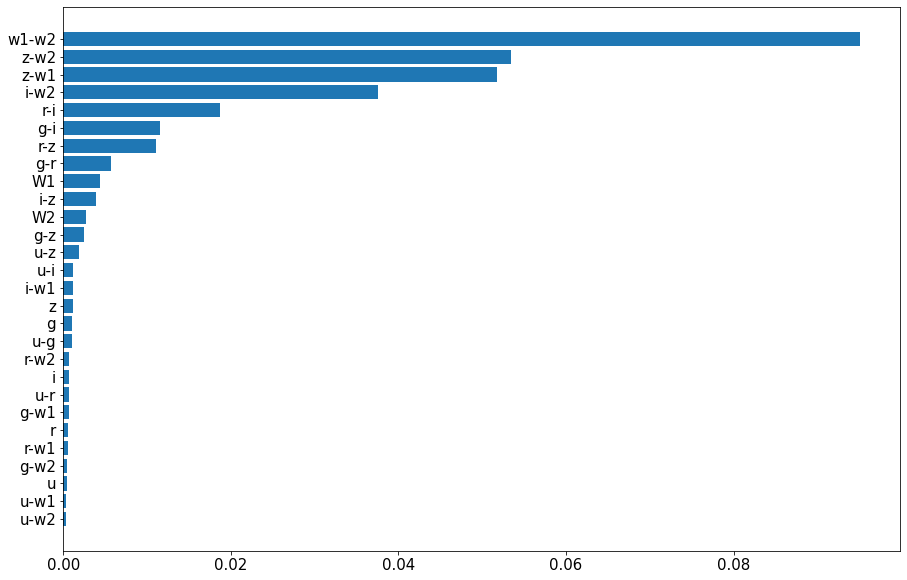

In [21]:
print(np.array(featureImport).shape)

arrimp = np.array(featureImport).mean(0)
print(arrimp.shape)
print(arrimp)

pyplot.rcParams["figure.figsize"] = (15,10)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['ytick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['xtick.labelsize'] = (15)# 'xtick.labelsize', 'ytick.labelsize'
pyplot.rcParams['axes.labelsize'] = 15
pyplot.rcParams['axes.titlesize'] = 15
sorted_idx = arrimp.argsort()

pyplot.barh(attrNames[sorted_idx], arrimp[sorted_idx])
# pyplot.barh(range(35), arrimp)

pyplot.show()

In [22]:
print(attrNames[sorted_idx][-7:])

['r-z' 'g-i' 'r-i' 'i-w2' 'z-w1' 'z-w2' 'w1-w2']


In [27]:
dataAve_imp = df_mean [attrNames[sorted_idx][-7:]]
dataAve_imp = dataAve_imp.join(df_main [['specclass']])

In [28]:
print(dataAve_imp.head(2))
print(dataAve_imp.shape)

        r-z       g-i       r-i      i-w2      z-w1      z-w2  w1-w2  \
0  0.399185  0.263567  0.237312  1.067213  0.439341  0.905341  0.466   
1  0.995435  1.706725  0.686108  0.612166  0.712839  0.302839 -0.410   

                          specclass  
0  QSO                               
1  GALAXY                            
(3500958, 8)


In [29]:
import numpy as np
chosen_idx = np.random.choice(3500958 , replace=False, size=5000) # this line migh be a probem, because we need to stratify
data_sample = dataAve_imp.iloc[chosen_idx]


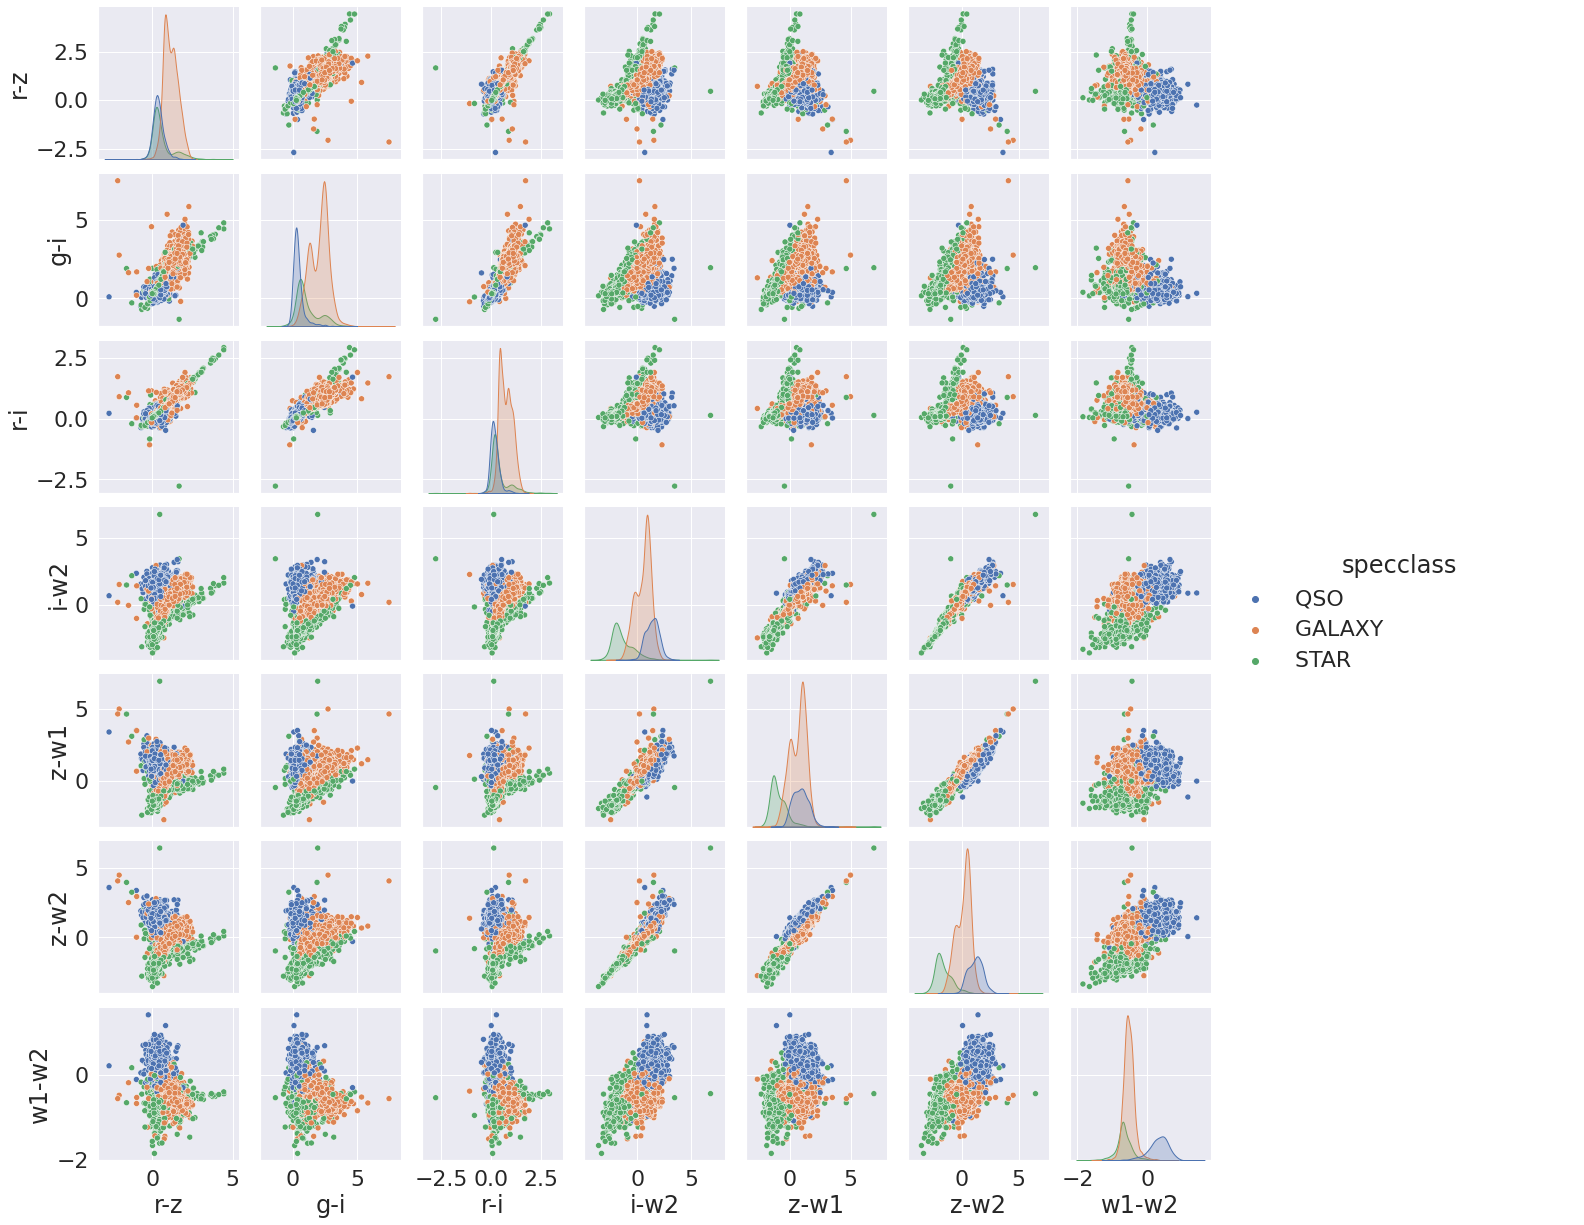

In [31]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(data_sample, hue="specclass")

### Classification on the enginnered features

In [36]:
from sklearn.model_selection import train_test_split
xAve_imp = dataAve_imp.drop(['specclass'], axis = 1)

Xtrain, Xtest, Ytrain, Ytest = train_test_split( xAve_imp, labels, test_size = 0.4, random_state=3, stratify=labels) # train and valid sets

In [38]:
print(Xtrain.shape)
print(Ytrain.shape)

(2100574, 7)
(2100574,)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *


### RF on the 7 enginnered features

In [43]:
model = RandomForestClassifier(n_jobs = -1)
model.fit(Xtrain, Ytrain)
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()
print(accuracy)

Classification
              precision    recall  f1-score   support

           0       0.97      0.98      0.98    858209
           1       0.96      0.95      0.95    275974
           2       0.96      0.94      0.95    266201

    accuracy                           0.97   1400384
   macro avg       0.96      0.96      0.96   1400384
weighted avg       0.97      0.97      0.97   1400384

Matrix
[[840694   9506   8009]
 [ 11659 263104   1211]
 [ 13723   2481 249997]]

0.9667312679950643


### LR on the 7 enginnered features

In [44]:
model = LogisticRegression(n_jobs = -1)
model.fit(Xtrain, Ytrain) 
predictions = model.predict(Xtest)
print("Classification")
print(classification_report(Ytest,predictions))
print("Matrix")
print(confusion_matrix(Ytest,predictions))
accuracy = accuracy_score(Ytest, predictions)
print()

Classification
              precision    recall  f1-score   support

           0       0.95      0.96      0.95    858209
           1       0.95      0.94      0.94    275974
           2       0.90      0.87      0.89    266201

    accuracy                           0.94   1400384
   macro avg       0.93      0.92      0.93   1400384
weighted avg       0.94      0.94      0.94   1400384

Matrix
[[821743  11699  24767]
 [ 17109 258585    280]
 [ 30699   3291 232211]]



### Conclusion
#### RF with averaged features does not improve upon RF with modelMag, however LR with averaged features does show some improvemnts compared to LR with just modelMag 

### Is there are More features that can be explored ??
yes we can create more features per data type (Modelmag, Cmodelmag, PSFmag), where each can reach up to 56 features.

so currently what we have is the following:
 - 7 (modelmag)_ugriz and w12mpro magnitudes
 - 21 (modelmag)_ugriz and w12mpro colors


what we can do more are the following:
- 7 extinction_ugrizw1w2 magnitudes
- 7 dered_modelmag_ugrizw1w2 = modelmag_ugrizw1w2 - extinction_ugrizw1w2 magnitudes
- 21 dered_modelmag_ugriz and dered_w12mpro colors? 

